# Minimal DL1 dashboard for data exploration

Potential improvments:
    - widgets between the plots - or on the side
    - colorbars
    - log box
    - using cufflink for more interactivity
        - selecting points or subsets directly in graphs
        
For now DL2 data include also DL1 parameters so this was easy to mix.

In [59]:
%matplotlib notebook
from ipywidgets import *
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
import tables
import copy
from astropy.table import Table, join
from lstchain.io.io import dl1_images_lstcam_key, dl1_params_lstcam_key, dl2_params_lstcam_key
from matplotlib.colors import LogNorm
# import cufflinks
from ctapipe.image.hillas import HillasParametersContainer
import astropy.units as u
from astropy.coordinates.angles import Angle

In [3]:
with tables.open_file('dl1_data/dl1_LST-1.2.Run01541.0040.fits.h5') as t:
    t1 = Table(t.root[dl1_params_lstcam_key][:])
    ti = Table(t.root[dl1_images_lstcam_key][:])
with tables.open_file("dl1_data/dl2_dl1_LST-1.2.Run01541.0040.fits.h5") as t:
    t2 = Table(t.root[dl2_params_lstcam_key][:])

In [23]:
j = join(t2, ti, keys='event_id')

In [5]:
geom = CameraGeometry.from_name('LSTCam-002')

In [6]:
colnames = copy.copy(j.colnames)
colnames.remove('image')
colnames.remove('pulse_time')

In [8]:
# j = j[j['log_intensity']>4]

In [30]:
hillas = HillasParametersContainer()

<IPython.core.display.Javascript object>


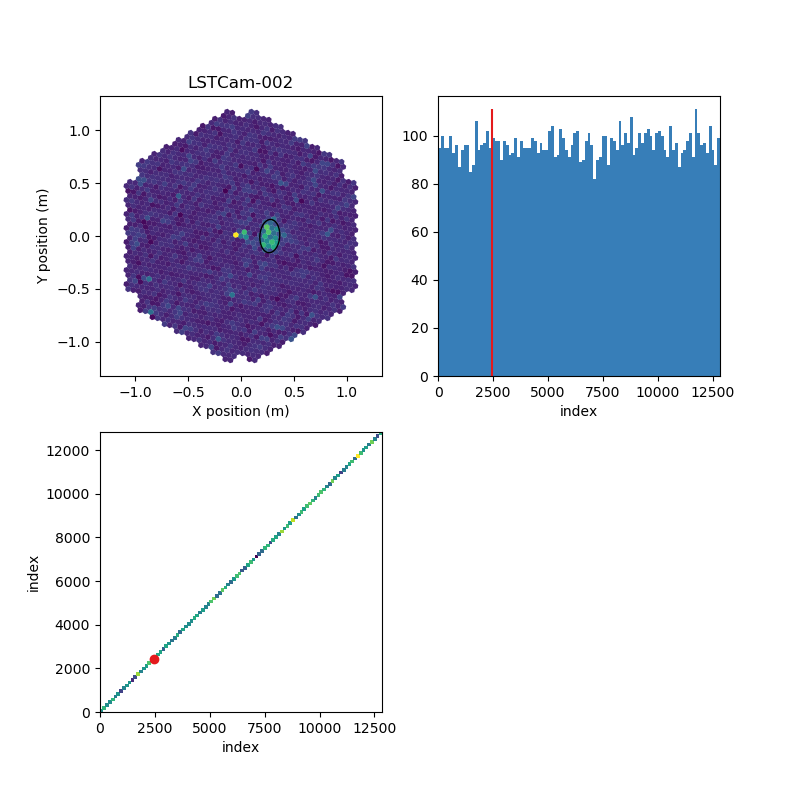

interactive(children=(Dropdown(description='colname', options=('index', 'event_id', 'intensity', 'intercept', …

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(8,8))
camera_display = CameraDisplay(geom, ax=axes[0,0])
out = Output(layout={'width': '300px', 'height': '300px'})

def update(colname=colnames, i=IntSlider(0, 0, len(j)), histx=colnames, histy=colnames):
    
    for c in ['x', 'y', 'length', 'width']:
        hillas[c] = j[c][i] * u.m
    hillas['psi'] = Angle(j['psi'][i] * u.rad)
    hillas['phi'] = Angle(j['phi'][i] * u.rad)
    
    axes[0,1].clear()
    axes[1,0].clear()
    opt = dict(bins=100, log=False, color='#377eb8')
    n, bins, pathes = axes[0,1].hist(j[colname], **opt)
    axes[0,1].set_xlabel(colname)
    x = j[colname][i]
    axes[0,1].vlines(x, 0, n.max(), color='#e41a1c')
    axes[0,1].set_xlim(j[colname].min(), j[colname].max())
    _,_,_,im = axes[1,0].hist2d(j[histx], j[histy], bins=100, norm=LogNorm())
    axes[1,0].set_xlabel(histx)
    axes[1,0].set_ylabel(histy)
    axes[1,0].scatter(j[histx][i], j[histy][i], color='#e41a1c')
    axes[1,1].set_visible(False)
    camera_display.image = j['image'][i]
    camera_display.overlay_moments(hillas, with_label=False)
    fig.canvas.draw_idle()

w = interact(update);


In [72]:
# Define the layout here.
# box_layout = Layout(display='flex',
#                     flex_flow='row', 
#                     justify_content='space-between', 
#                     align_items='center',
#                     toto='top'
#                    );

# display(HBox([out,
#               w.widget.children[0], 
#               w.widget.children[1], 
#               w.widget.children[2], 
#               w.widget.children[3]], layout=box_layout));